# Binary Logistic Regression

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc

In [121]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Notes:

There are no null values in the dataset.

'Default' has 32588 'no', 8597 'unknown', 3 'yes'; thus, the variable is not quite representative at this dataset.

'Month', 'day_of_week' relate only to date that seems to have less impact on Y than other variables

'Pdays' and 'Previous' relate to nearly the same information but reflect it in different manner. Seems that 'Previous' could be more representative since in represents a number of previous contacts.

Employment variation rate, consumer price index, consumer confidence index, euribor 3 month rate, number of employees relate more to current situation in a country / in a bank, which means that they depend more on the date when contact has been performed than to a person itself. Nevertheless, these vars can influence Y.

Actually, it is better to check on plots the dependencies between variables (age, job, marital, education, housing, loan, contact, duration, campaign, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) and Y. The most promising ones can be then used in logistic regression

In [123]:
df['y'] = df['y'].astype('category')

In [124]:
df['job'] = df['job'].astype('category')

In [125]:
df['marital'] = df['marital'].astype('category')

In [126]:
df['education'] = df['education'].astype('category')

In [127]:
df['housing'] = df['housing'].astype('category')

In [128]:
df['loan'] = df['loan'].astype('category')

In [129]:
df['contact'] = df['contact'].astype('category')

In [130]:
df['poutcome'] = df['poutcome'].astype('category')

## Variable analysis for logistic regression

Here, we check how Y depends on the variables mentioned above

In [131]:
numerical = ['age','duration','campaign','previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job','marital','education','housing','loan','contact','poutcome']

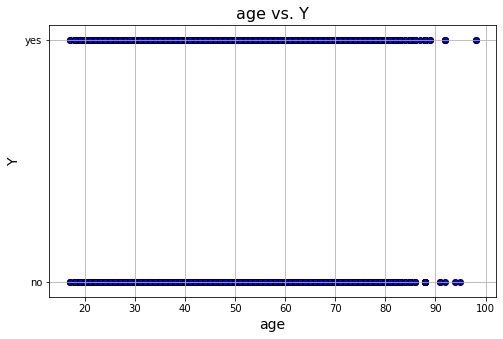

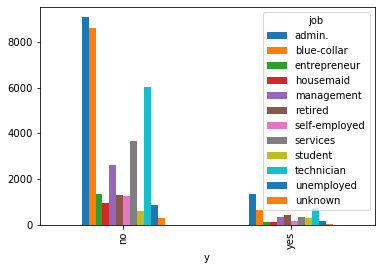

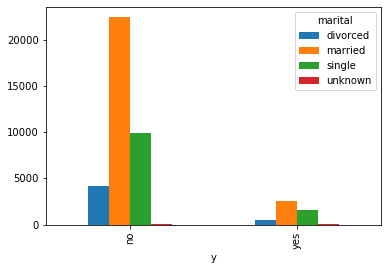

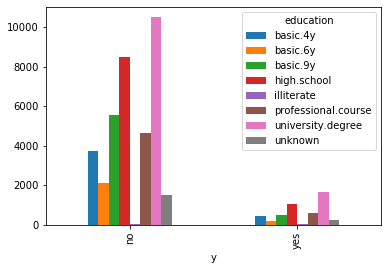

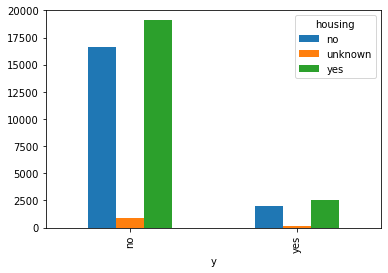

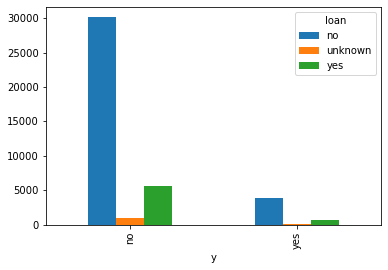

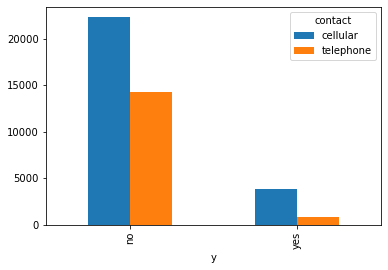

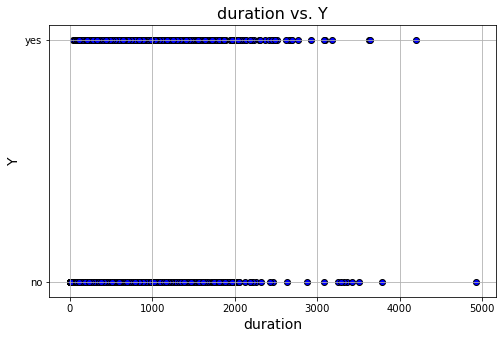

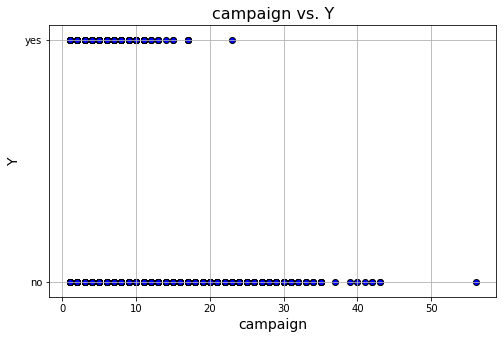

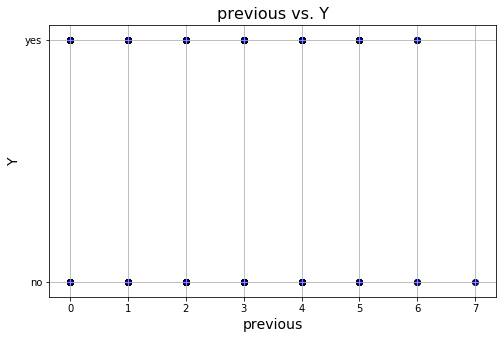

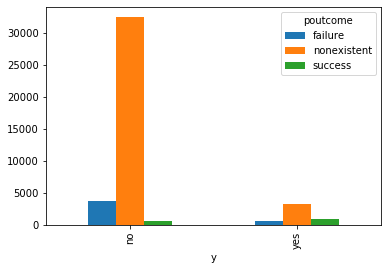

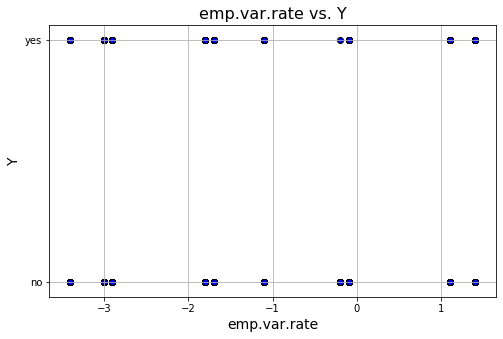

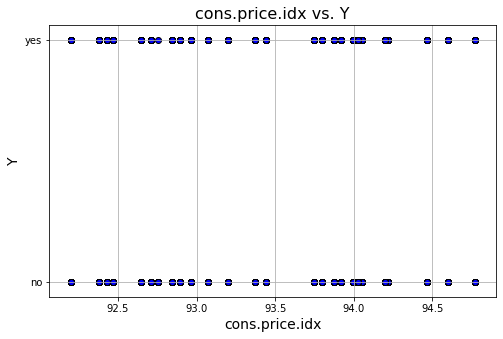

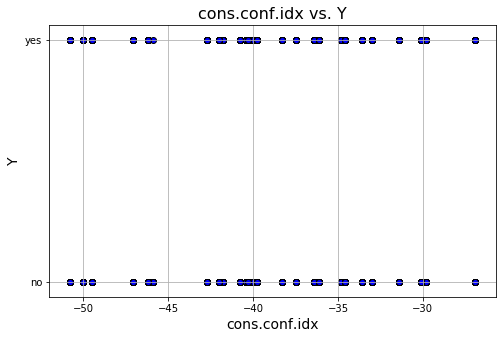

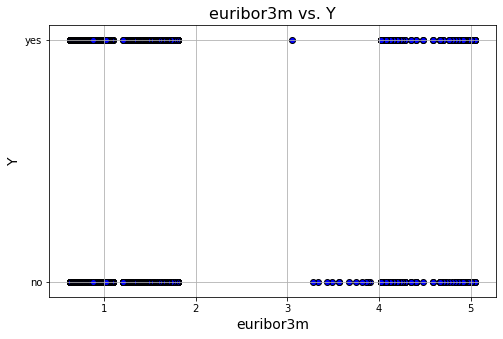

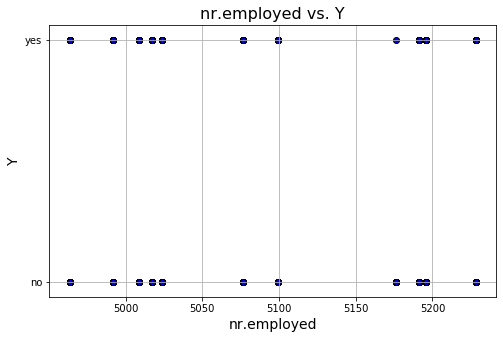

In [132]:
for c in df.columns[0:]:
    if c in numerical:
        plt.figure(figsize=(8,5))
        plt.title('{} vs. Y'.format(c), fontsize=16)
        plt.scatter(x=df[c], y=df.y, color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('Y', fontsize=14)
        plt.show()
    elif c in categorical:
        ct = pd.crosstab(df.y, df[c])
        ct.plot.bar()

There is almost no relation between Age and Y according to the plot: the difference occurs only at 90+.
There is some relation between Job and Y since job categories are distributed differently when Y = yes and when Y = no.
There is some relation between Marital and Y since marital categories are distributed differently (in comparison to other category groups, bigger proportion of single persons take a loan and lesser proportion does not take a loan).
There is almost no relation between Education and Y - eduction categories distributed in nearly the same way.
There is almost no relation between Housing and Y - housing categories distributed in nearly the same way.
There is almost no relation between Loan and Y - loan categories distributed in nearly the same way.
There is some relation between Contact and Y - contacted by telephone in most cases reject a loan.
There is a weak relation between Duration and Y - the only difference is at 3000+: here, in most cases, a person would not take a loan.
There is some relation between Campaign and Y - if campaign > 18, in 98% cases Y equals to No.
There is a weak relation between Previous and Y - if previous = 7, Y is guaranted to be No.
There is some relation between Poutcome and Y - if Poutcome = Success, there is a greater chance that a person would accept a loan.
There is no relation between variables 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','nr.employed' and Y - the distribution for Y=yes and Y=no is almost the same.
There is some relation between 'euribor3m' and Y - starting from euribor > 3, there is a much higher chance that a person would reject a loan.

So, we can take the following variables as predictors:

- Job
- Marital
- Contact
- Duration
- Campaign
- Previous
- Poutcome
- Euribor3m

In [133]:
df_cleaned = df.drop(['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed','education','housing','loan','default','month','day_of_week','pdays'], 1)
df_cleaned

<ipython-input-133-be564d826e05>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cleaned = df.drop(['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed','education','housing','loan','default','month','day_of_week','pdays'], 1)


,job,marital,contact,duration,campaign,previous,poutcome,euribor3m,y
0,housemaid,married,telephone,261,1,0,nonexistent,4.857,no
1,services,married,telephone,149,1,0,nonexistent,4.857,no
2,services,married,telephone,226,1,0,nonexistent,4.857,no
3,admin.,married,telephone,151,1,0,nonexistent,4.857,no
4,services,married,telephone,307,1,0,nonexistent,4.857,no
...,...,...,...,...,...,...,...,...,...
41183,retired,married,cellular,334,1,0,nonexistent,1.028,yes
41184,blue-collar,married,cellular,383,1,0,nonexistent,1.028,no
41185,retired,married,cellular,189,2,0,nonexistent,1.028,no
41186,technician,married,cellular,442,1,0,nonexistent,1.028,yes


In [134]:
df_with_dummies = pd.get_dummies(df_cleaned, columns=['job','marital','contact','poutcome'])
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   duration              41188 non-null  int64   
 1   campaign              41188 non-null  int64   
 2   previous              41188 non-null  int64   
 3   euribor3m             41188 non-null  float64 
 4   y                     41188 non-null  category
 5   job_admin.            41188 non-null  uint8   
 6   job_blue-collar       41188 non-null  uint8   
 7   job_entrepreneur      41188 non-null  uint8   
 8   job_housemaid         41188 non-null  uint8   
 9   job_management        41188 non-null  uint8   
 10  job_retired           41188 non-null  uint8   
 11  job_self-employed     41188 non-null  uint8   
 12  job_services          41188 non-null  uint8   
 13  job_student           41188 non-null  uint8   
 14  job_technician        41188 non-null  uint8   
 15  jo

## Regression model

#### Hypothesis:

H0: The linear regression model constructed for a dependent variable 'Y' and the following predictors:
- Job
- Marital
- Contact
- Duration
- Campaign
- Previous
- Poutcome
- Euribor3m

explains the variation of 'Y'.

H1: The aforementioned model does not explain the variation of 'Y'.

p-value = 0.05.

In [135]:
df_to_regression = df_with_dummies.drop(['job_unknown','marital_unknown','contact_telephone','poutcome_nonexistent'], 1)

<ipython-input-135-94870d55f275>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_to_regression = df_with_dummies.drop(['job_unknown','marital_unknown','contact_telephone','poutcome_nonexistent'], 1)


In [136]:
df_predictors = df_to_regression.drop('y',1)
df_dependent = df_to_regression['y']
df_dependent.replace(('yes','no'),(1,0),inplace=True) #Yes/no have to be parsed to 1/0

<ipython-input-136-cfb4d94e96e2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_predictors = df_to_regression.drop('y',1)


In [137]:
x_mult_constant = sm.add_constant(df_predictors)

In [138]:
model = sm.Logit(df_dependent, x_mult_constant).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.222914
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41166
Method:                           MLE   Df Model:                           21
Date:                Sun, 01 May 2022   Pseudo R-squ.:                  0.3668
Time:                        20:30:54   Log-Likelihood:                -9181.4
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9981      0.454     -4.401      0.000      -2.888      -1.108
duration

In [139]:
print('R^2 = {:f}'.format(model.prsquared))
print('Model significance = {:f}'.format(model.llr_pvalue))

R^2 = 0.366774
Model significance = 0.000000


##### Conclusion:

Model is statistically significant at p-value = 0.05 and explains 37% of variance of variable 'Y'. H1 is rejected at p-value = 0.05. 

#### Parameter significance

#### Hypotheses:

- H0_1: The variable job is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_2: The variable marital is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_3: The variable contact is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_4: The variable duration is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_5: The variable campaign is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_6: The variable previous is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_7: The variable poutcome is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_8: The variable euribor3m is statistically significant for the logistic regression model constructed for a dependent variable 'y'

- H1_1: The variable job is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_2: The variable marital is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_3: The variable contact is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_4: The variable duration is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_5: The variable campaign is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_6: The variable previous is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_7: The variable poutcome is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_8: The variable euribor3m is not statistically significant for the logistic regression model constructed for a dependent variable 'y'

p-value = 0.05

In [140]:
print(f'Statistically significant model parameters: {model.pvalues[model.pvalues < 0.05].index.values}')

Statistically significant model parameters: ['const' 'duration' 'campaign' 'previous' 'euribor3m' 'job_blue-collar'
 'job_retired' 'job_services' 'contact_cellular' 'poutcome_failure'
 'poutcome_success']


In [141]:
print(f'Statistically nonsignificant model parameters: {model.pvalues[model.pvalues > 0.05].index.values}')

Statistically nonsignificant model parameters: ['job_admin.' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_self-employed' 'job_student' 'job_technician' 'job_unemployed'
 'marital_divorced' 'marital_married' 'marital_single']


#### Conclusion:

Duration, campaign, previous, euribor3m, job (partially), contact and poutcome are statistically significant. Thus, H1_2 is accepted at p-value = 0.05, H1_1, H1_3, H1_4, H1_5, H1_6, H1_7 and H1_8 are rejected.

### Regression equation

In [142]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('logit(p) = {:2f} + {}'.format(model.params[0], ' + '.join(l)))

logit(p) = -1.998094 + 0.00*duration + -0.05*campaign + 0.30*previous + -0.56*euribor3m + -0.04*job_admin. + -0.75*job_blue-collar + -0.44*job_entrepreneur + -0.09*job_housemaid + -0.13*job_management + 0.50*job_retired + -0.23*job_self-employed + -0.52*job_services + 0.27*job_student + -0.12*job_technician + 0.01*job_unemployed + 0.00*marital_divorced + 0.02*marital_married + 0.13*marital_single + 0.27*contact_cellular + -0.78*poutcome_failure + 1.34*poutcome_success


### Regression coefficients interpretation

Regression coefficients:

In [143]:
coefs = pd.DataFrame()
coefs['Coefs'] = model.params[1:]
coefs['Features'] = model.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model.params[0])
coefs

Intercept =  -1.9980941085518908


,Coefs
Features,
duration,0.004514
campaign,-0.051817
previous,0.296664
euribor3m,-0.563277
job_admin.,-0.042991
job_blue-collar,-0.753511
job_entrepreneur,-0.442676
job_housemaid,-0.086330
job_management,-0.134755


Odds:

In [144]:
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs

,Coefs,OddsRatio
Features,,
duration,0.004514,1.004524
campaign,-0.051817,0.949503
previous,0.296664,1.345363
euribor3m,-0.563277,0.569340
job_admin.,-0.042991,0.957920
job_blue-collar,-0.753511,0.470711
job_entrepreneur,-0.442676,0.642315
job_housemaid,-0.086330,0.917292
job_management,-0.134755,0.873930


Statistically significant model parameters: ['duration' 'campaign' 'previous' 'euribor3m' 'job_blue-collar'
 'job_retired' 'job_services' 'contact_cellular' 'poutcome_failure'
 'poutcome_success']. Description for them:

- One second increase in duration will increase the odds to deposit subscription by 0.4%.
- One contacts performed increase in campaign will decrease the odds to deposit subscription by 5%
- One contacts performed increase in previous campaigns will increase the odds to deposit subscription by 34%.
- One unit increase in euribor will decrease the odds to deposit subscription by 43%.
- For people with blue collar jobs odds to deposit subscription decrease by 53% in comparison to people with unknown job.
- For retired people odds to deposit subscription  increase by 64% in comparison to people with unknown job.\.
- For people with services jobs odds to deposit subscription decrease by 41% in comparison to people with unknown job.
- For contacts using cellular type odds to deposit subscription increase by 31% in comparison to telephone contacts.
- For people with the failed outcome for previous marketing campaing, odds to deposit subscription decrese by 54% in comparison to people with nonexistent outcome.
- For people with the successful outcome for previous marketing campaing, odds to deposit subscription 3.8 times higher in comparison to people with nonexistent outcome.

### Confusion matrix

In [145]:
cm = model.pred_table()
cm

array([[35633.,   915.],
       [ 2900.,  1740.]])

In [146]:
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 35633.0 | FN: 915.0
-------------------
FP: 2900.0  | TN: 1740.0


In [147]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9073759347382733


Accuracy rate for the model is greater than 0.9 which means that models fits the data very well.

### ROC-curve

In [148]:
fpr, tpr, _ = roc_curve(df_dependent, model.predict())
roc_auc = auc(fpr, tpr)

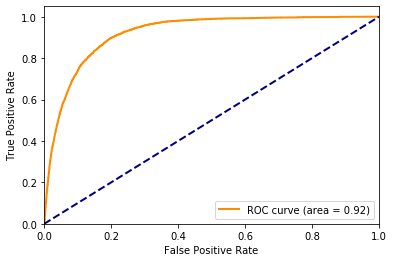

In [149]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

AUC equals to 0.92 which shows that the model fits the data very well

##  Model Diagnostics

### Residuals

##### Hypothesis:

H1: The distribution of residuals is different from the normal distribution

H0: The distribution of residuals is not different from the normal distribution

p-value = 0.05

In [150]:
p = stats.kstest(model.resid_generalized, 'norm', args=(model.resid_generalized.mean(), model.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

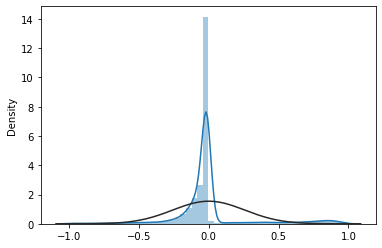

In [151]:
sns.distplot(model.resid_generalized, fit=stats.norm) 

##### Conclusion:

H1 is accepted at p-value = 0.05 : residuals significantly differ from the normal distribution.

### Multicollinearity

Multicollinearity can be checked to find any strong correlations between predictors

In [152]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

In [153]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
0,1.008783,duration
1,1.025271,campaign
18,1.214701,contact_cellular
3,1.548186,euribor3m
20,2.632202,poutcome_success
19,3.631560,poutcome_failure
12,3.667968,job_student
14,3.982859,job_unemployed
7,4.117375,job_housemaid
2,4.765811,previous


There is a multicollinearity problem since some groups of 'marital' and 'job' predictors have strong correlation with each other. Probably, the removement of these categorical variables can improve the quality of the model, but in this task there should be at least 3 categorical vars, so it was decided not to remove anything.

### Saving probability of Y to the source dataframe:

In [154]:
df['probability'] = model.predict()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,probability
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.024692
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.009755
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.013753
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.015837
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.019704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.416477
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.203111
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.260459
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.386230


## Final conclusions:

The obtained model shows a very high accuracy and AUC; thus the model fits the data quite well and indeed provides a possibility to predict the subscription to a term deposit. However, according to model diagnosis performed, there is a problem of multicollinearity due to particular groups of marital category and job category. In the further research, these variables can be removed and the problem would be resolved. Residuals are not normally distributed and highly skewed - probably, it is due to the fact that quantity of FP is significantly greater than quantity of FN. All in all, the model the the data quite well, but it still only describes 37% of variance of Y